<a href="https://colab.research.google.com/github/CameronBannick/Sales_Predictions/blob/main/05_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/drive/MyDrive/Coding Dojo/Week 1/05_sales_predictions.csv'


In [23]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
#check for dupliaction
df.duplicated().sum()

0

In [25]:
df.info()
#datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
df.isna().sum()
#missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
df = df.drop(columns=['Item_Weight', 'Outlet_Size'])
#I chose to remove them completely, there are so many missing i'm not sure you will get a flected mean or mode
#also removing other columns that are hard to categorize 
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [28]:
#confirming there are no more missing values
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

The following will all be checking each column for inconsistencies 

In [29]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [33]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

The following is finding the median, mode, and mean for each numerical categorie



Item MRP



In [34]:
item_mrp_min = df['Item_MRP'].min()
item_mrp_min.round(2)



31.29

In [35]:
item_mrp_mean = df['Item_MRP'].mean()
item_mrp_mean.round(2)

140.99

In [36]:
item_mrp_max = df['Item_MRP'].max()
item_mrp_max.round(2)

266.89

Item Outlet Sales

In [37]:
item_sales_min = df['Item_Outlet_Sales'].min()
item_sales_min.round(2)

33.29

In [38]:
item_sales_mode = df['Item_Outlet_Sales'].mode()
item_sales_mode.round(2)

0    958.75
dtype: float64

In [39]:
item_sales_max = df['Item_Outlet_Sales'].max()
item_sales_max.round(2)

13086.96

## Data Visualizations

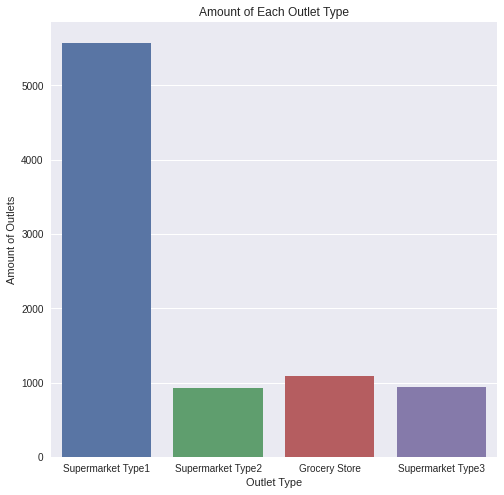

In [40]:
plt.figure(figsize=(8,8))

sns.countplot(data=df, x='Outlet_Type')

plt.xlabel('Outlet Type')
plt.ylabel('Amount of Outlets')

plt.title('Amount of Each Outlet Type')

plt.style.use("seaborn")



As far as the amount of each Outlet Type, it is overwhelmingly Supermarket Type 1

[Text(0.5, 1.0, 'Amount of Profit Per Item')]

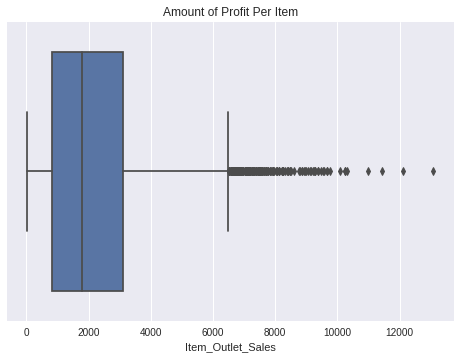

In [41]:
sns.boxplot(data=df, x='Item_Outlet_Sales').set(title='Amount of Profit Per Item')

In the 25 percentile we get around 1000 and in the 75th is around 3000.

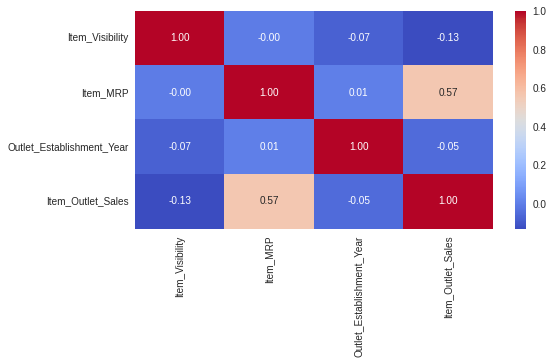

In [42]:
corr = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f') #I dont know why the whole data isnt being graphed

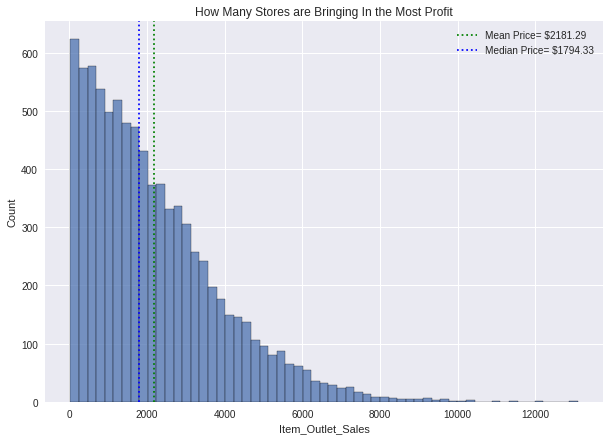

In [43]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(data=df, x='Item_Outlet_Sales', ax=ax)
ax.set(title='How Many Stores are Bringing In the Most Profit')
             

mean_price = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_price,color='g', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = df['Item_Outlet_Sales'].median()
ax.axvline(med_price,color='b', ls=':', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend();

plt.style.use('ggplot')

The average product makes 2181.29 and the Median is 1794.33

Text(0, 0.5, 'Item Outlet Sales')

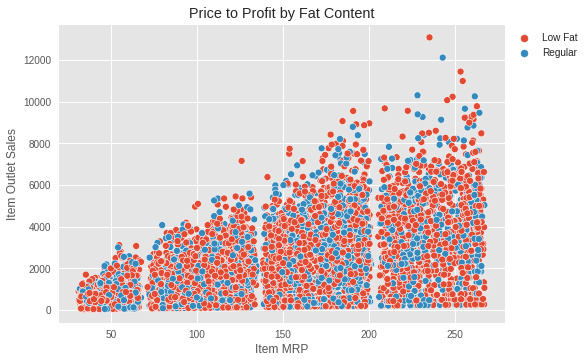

In [44]:
ax = sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content')
ax.legend(bbox_to_anchor=[1,1]);
ax.set_title('Price to Profit by Fat Content')
ax.set_xlabel('Item MRP')
ax.set_ylabel('Item Outlet Sales')

As expected, there is a direct correlation between price to total sales, but it seems the low fat foods are more popular